In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('signal-data.csv')

print("First few rows of the dataset:\n", data.head())
print(f"Shape of the dataset: {data.shape}")
print("Column names:\n", data.columns)
print("Data types:\n", data.dtypes)

non_numeric_cols = data.select_dtypes(include=['object']).columns
print("Non-numeric columns:\n", non_numeric_cols)

missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

print("Summary statistics:\n", data.describe(include='all'))


First few rows of the dataset:
                   Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('signal-data.csv')

print(data.info())
print(data.describe(include='all'))

missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

threshold = 0.3
cols_to_drop = missing_values[missing_values / len(data) > threshold].index
data = data.drop(columns=cols_to_drop)  
print(f"Dropped columns with > {threshold*100}% missing values: {cols_to_drop}")

numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode = data[col].mode()[0]
    data[col] = data[col].fillna(mode)  

print("Remaining missing values in each column:\n", data.isnull().sum())

columns_to_drop = ['Time']
data = data.drop(columns=columns_to_drop, errors='ignore') 
print(f"Dropped columns: {columns_to_drop}")

label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

target_column = 'Pass/Fail'
if target_column in data.columns:
    data[target_column] = data[target_column].map({'-1': 0, '1': 1})
    print("Target variable after encoding:\n", data[target_column].value_counts())
else:
    print(f"Target column '{target_column}' does not exist in the dataset.")

print("First few rows after cleansing:\n", data.head())
print(f"Shape of the dataset after cleansing: {data.shape}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB
None
                       Time            0            1            2  \
count                  1567  1561.000000  1560.000000  1553.000000   
unique                 1534          NaN          NaN          NaN   
top     2008-10-15 01:52:00          NaN          NaN          NaN   
freq                      3          NaN          NaN          NaN   
mean                    NaN  3014.452896  2495.850231  2200.547318   
std                     NaN    73.621787    80.407705    29.513152   
min                     NaN  2743.240000  2158.750000  2060.660000   
25%                     NaN  2966.260000  2452.247500  2181.044400   
50%                     NaN  3011.490000  2499.405000  2201.066700   
75%                     NaN  3056.650000  2538.822500  2218.055500   
max                     NaN  3356.350000  2846.

                  Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  P

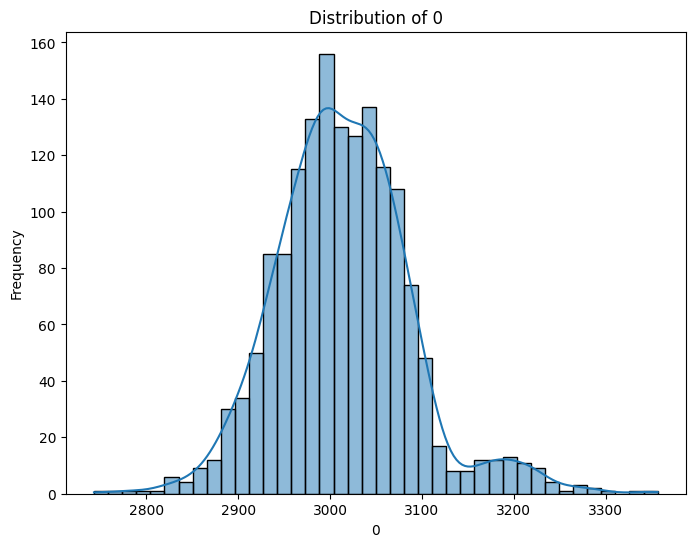

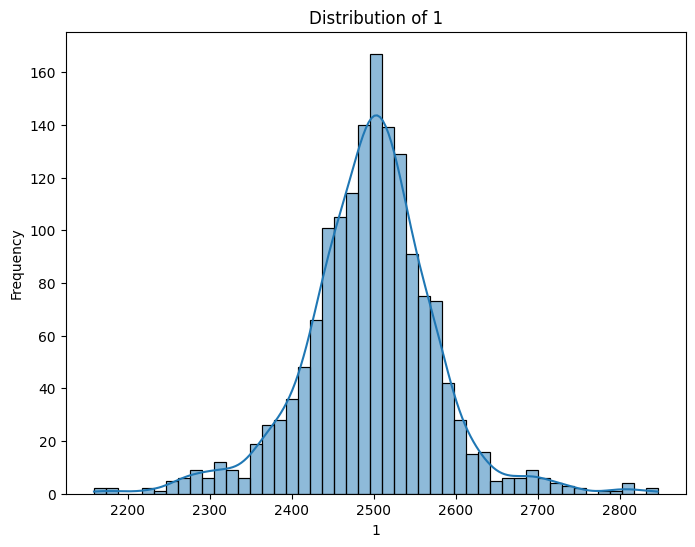

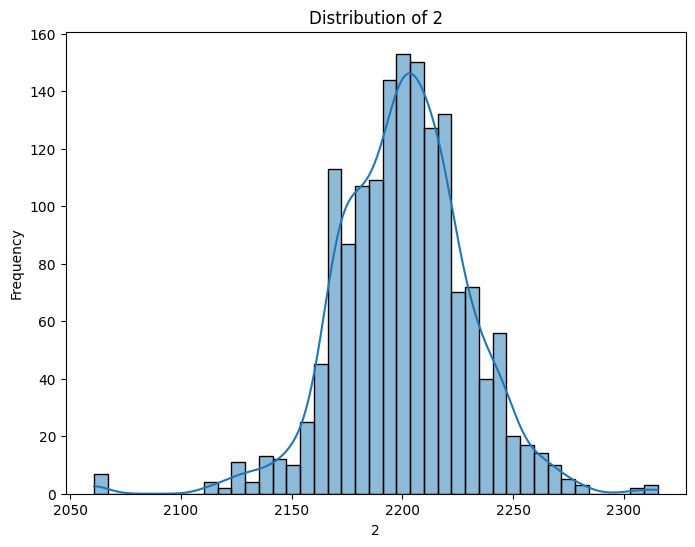

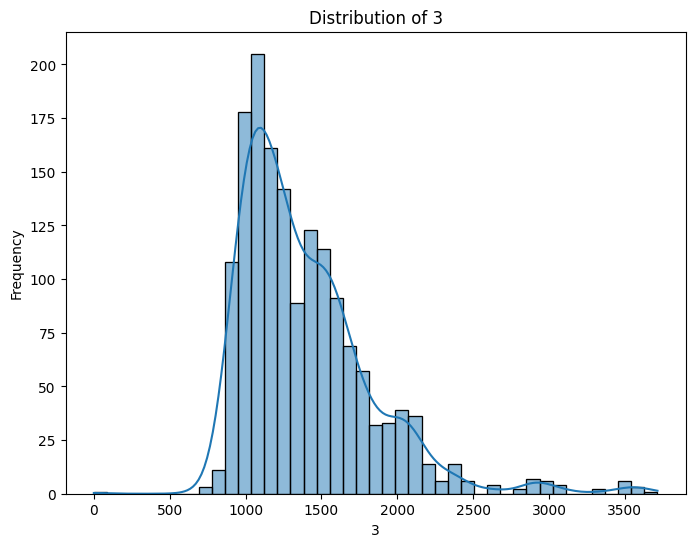

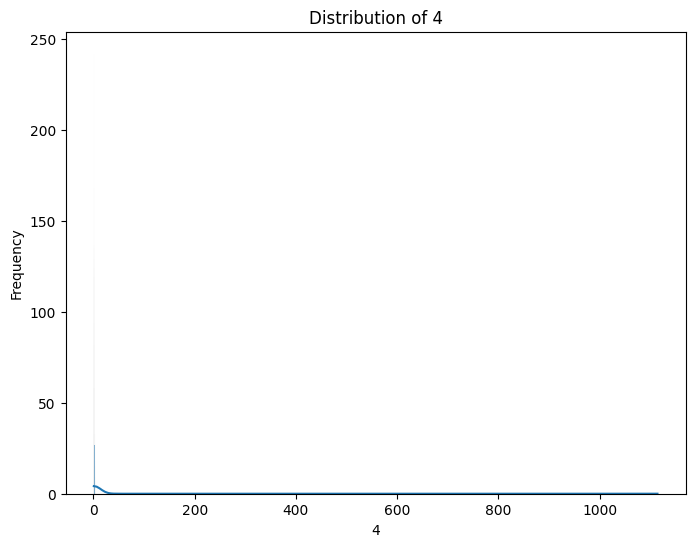

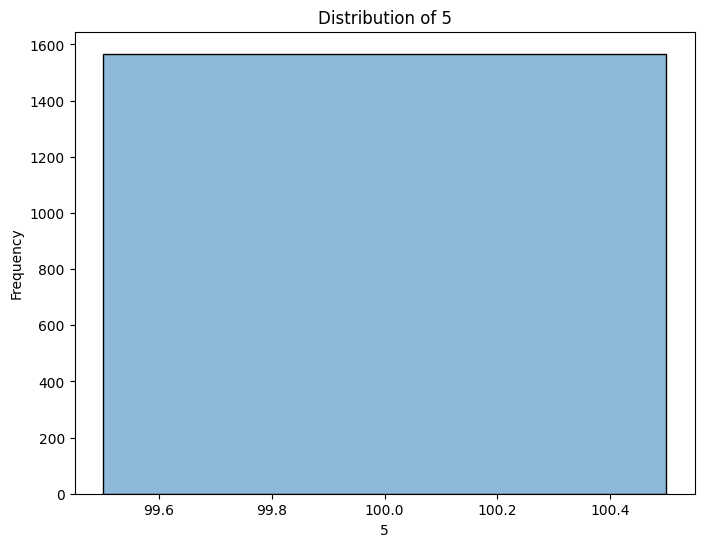

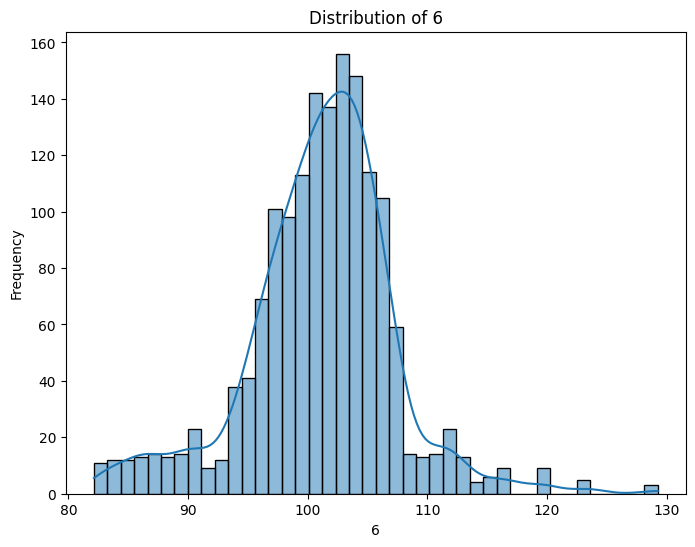

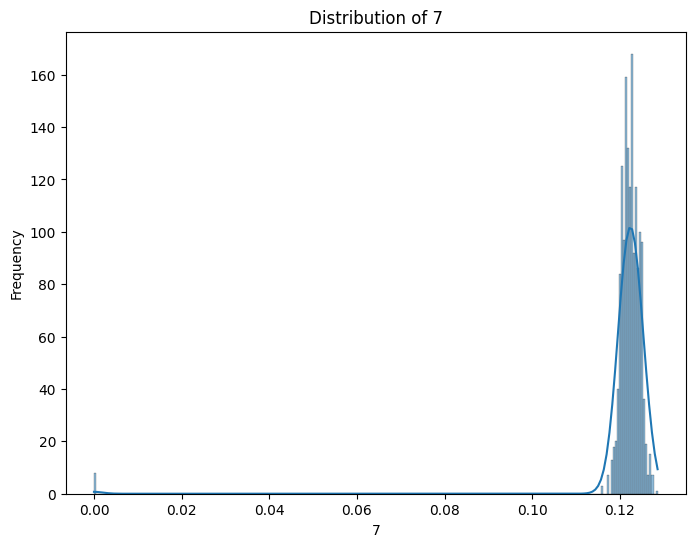

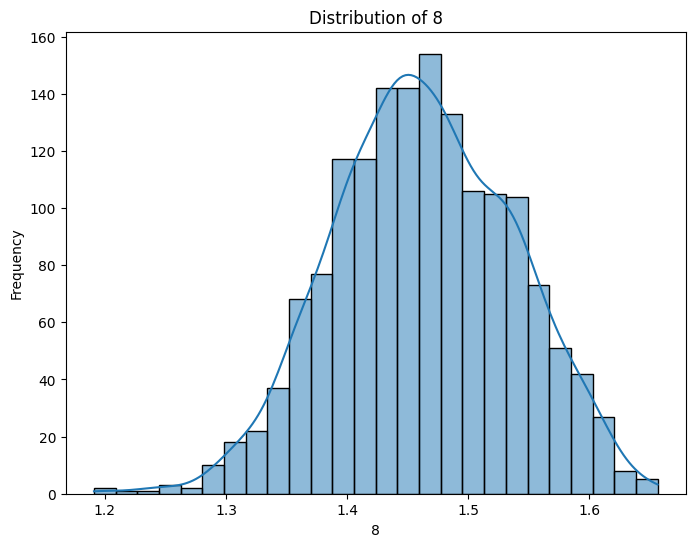

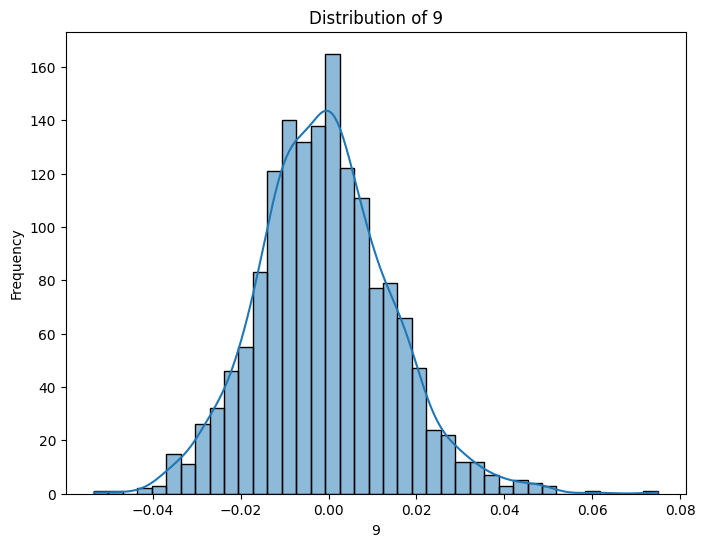

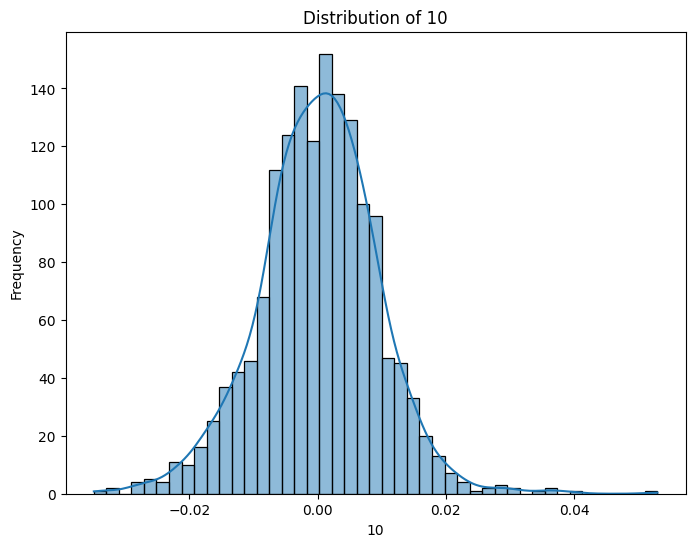

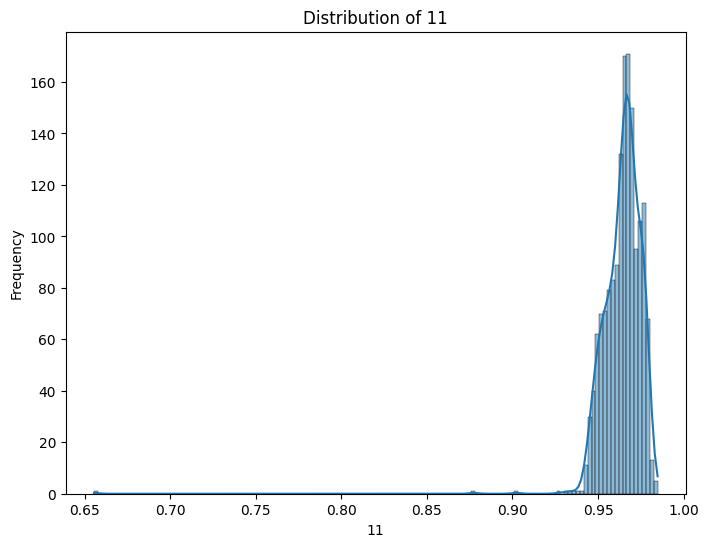

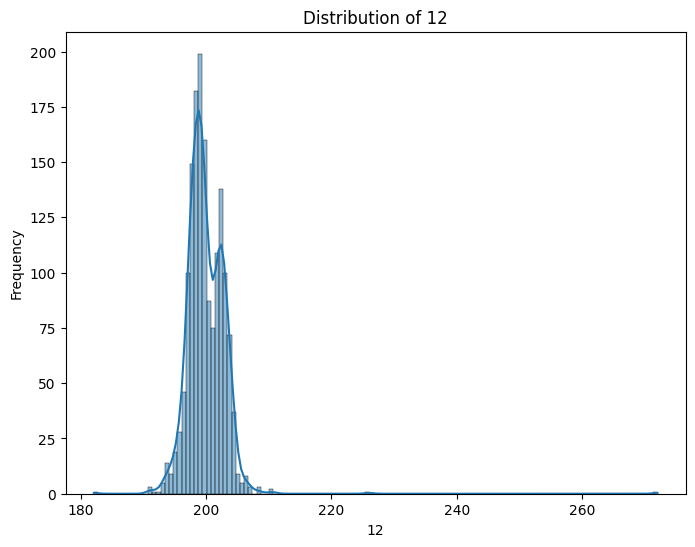

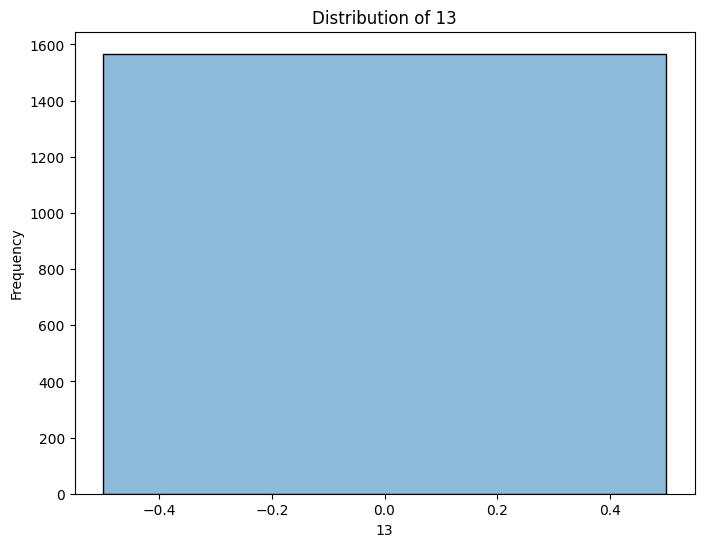

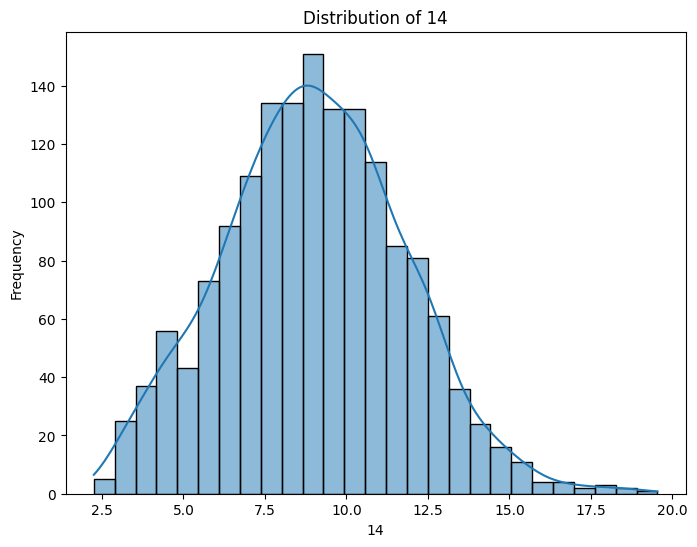

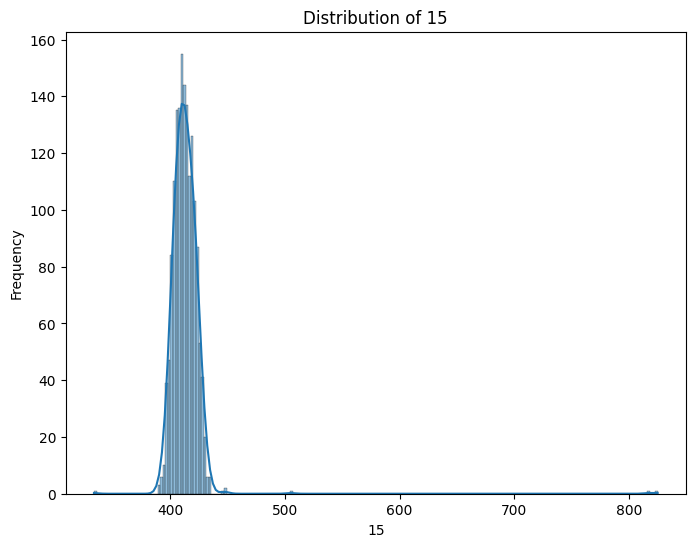

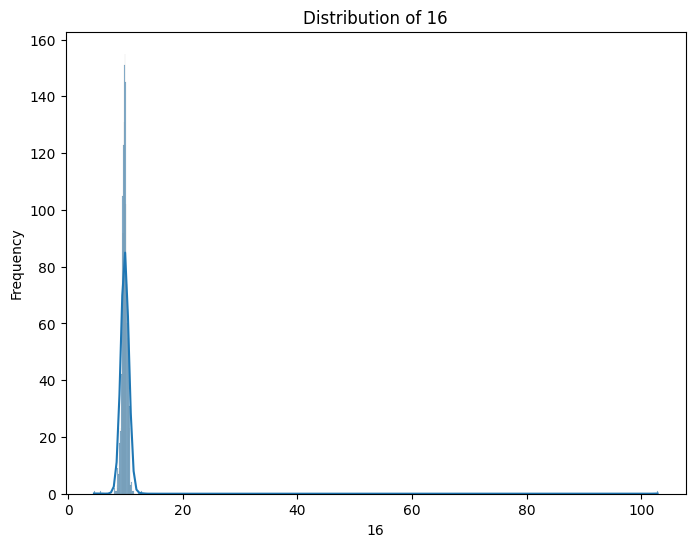

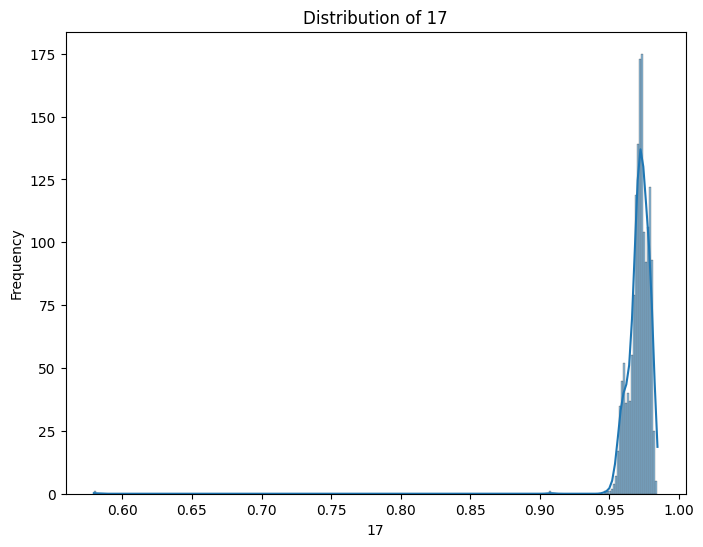

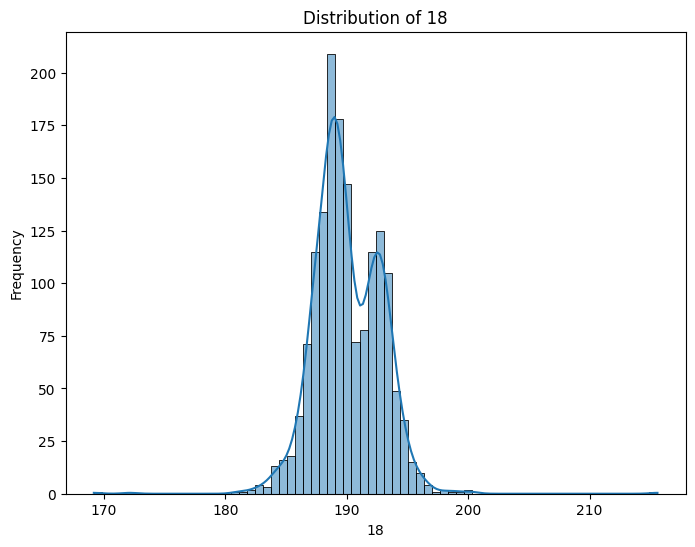

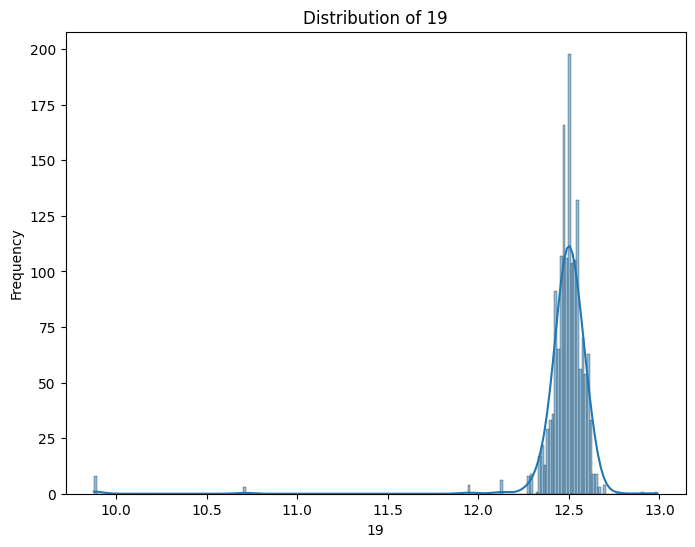

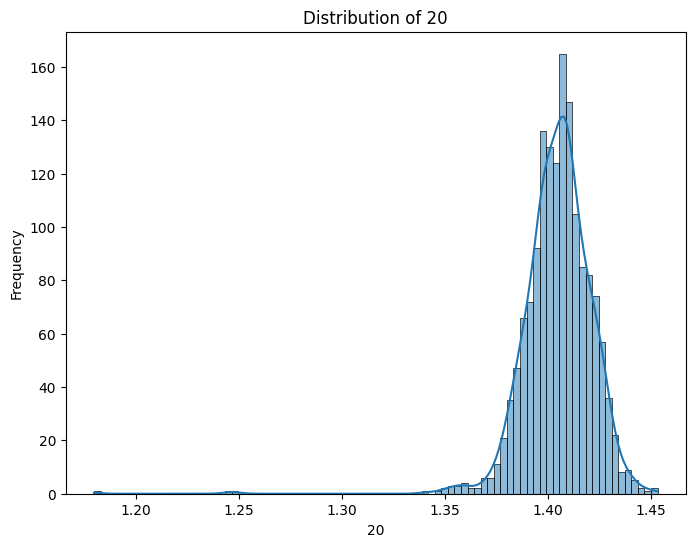

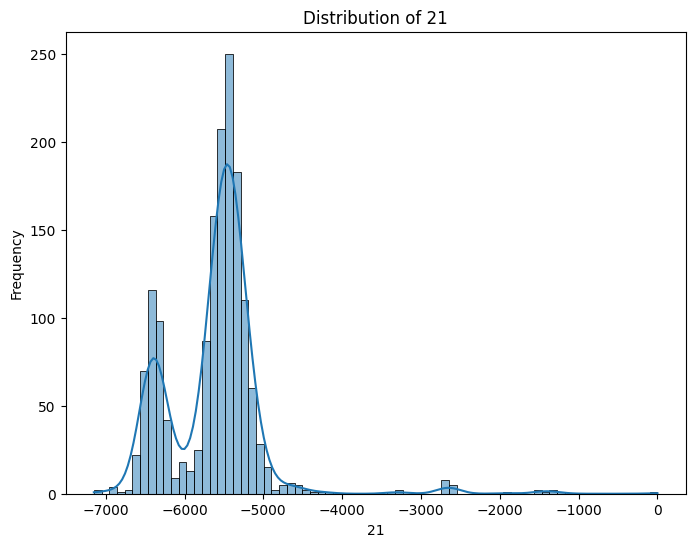

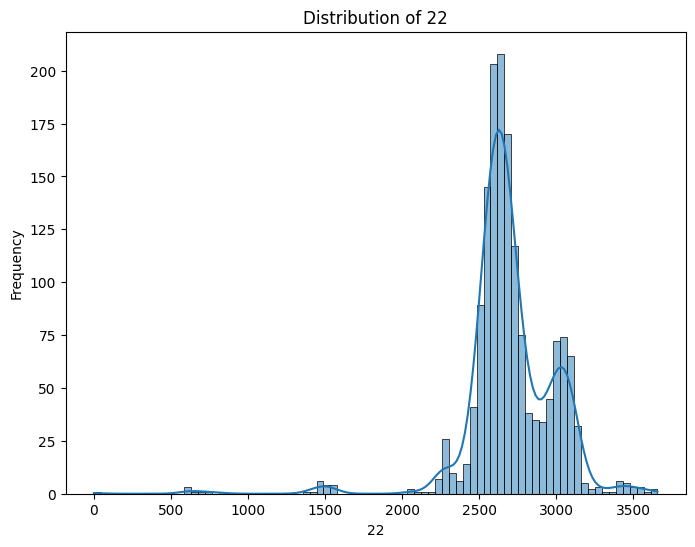

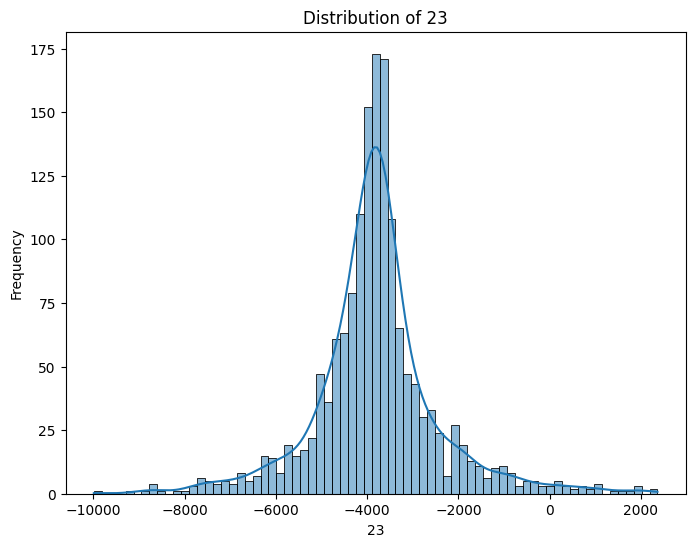

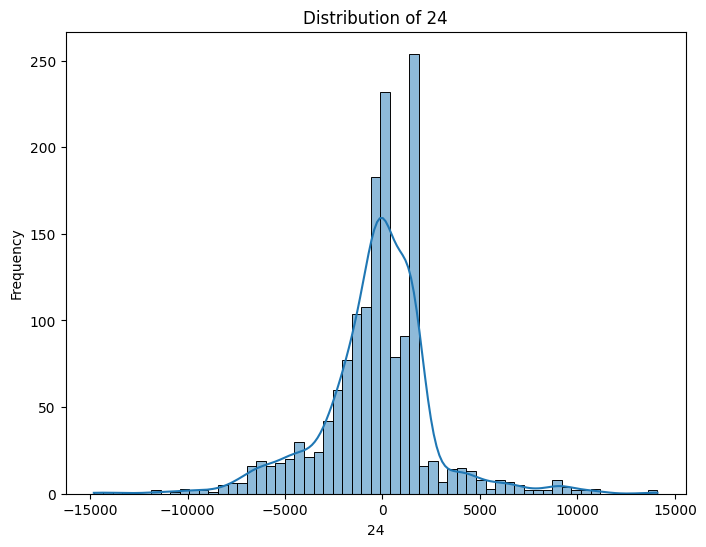

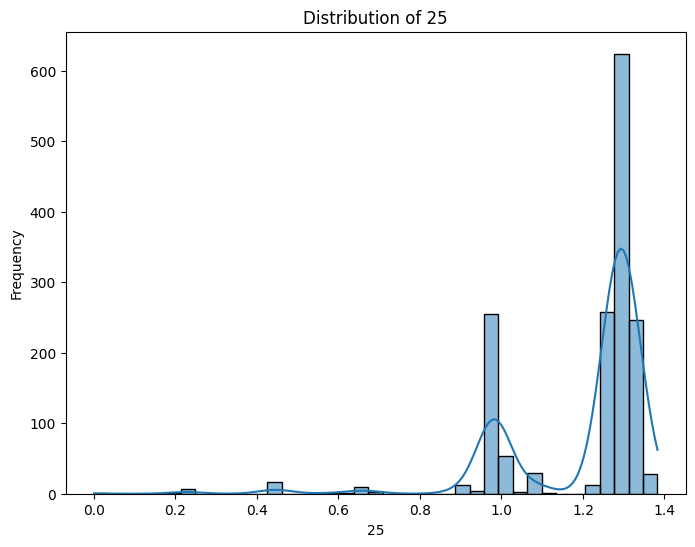

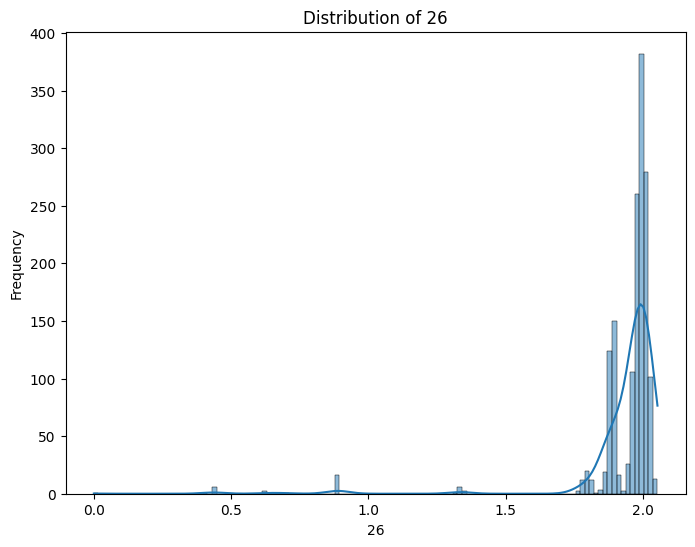

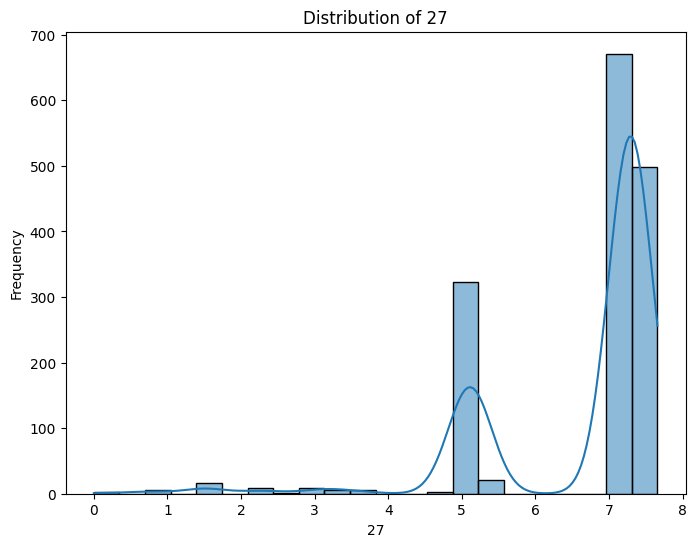

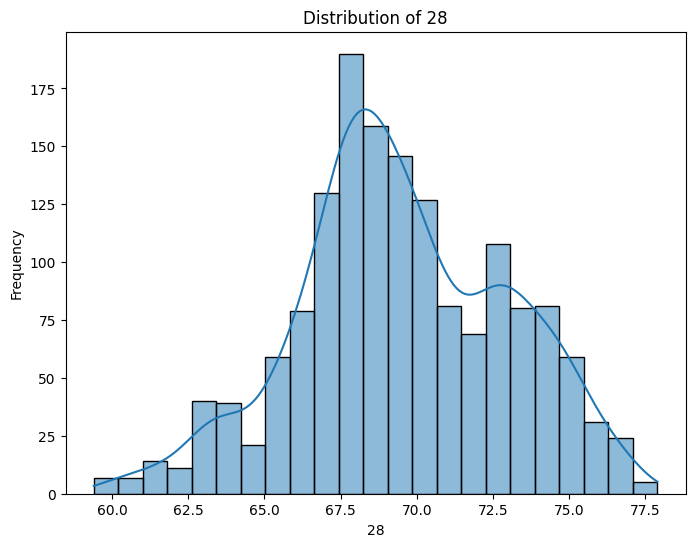

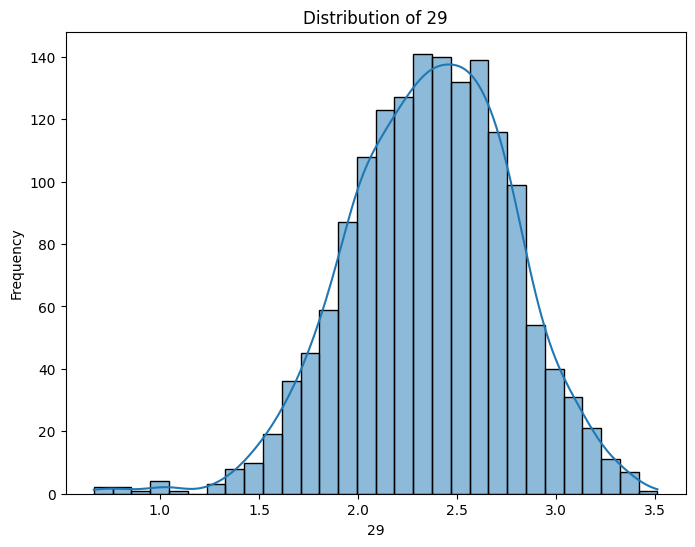

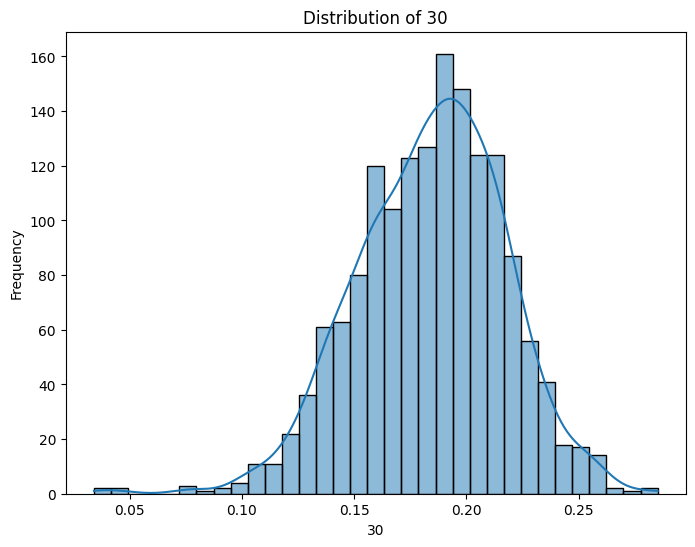

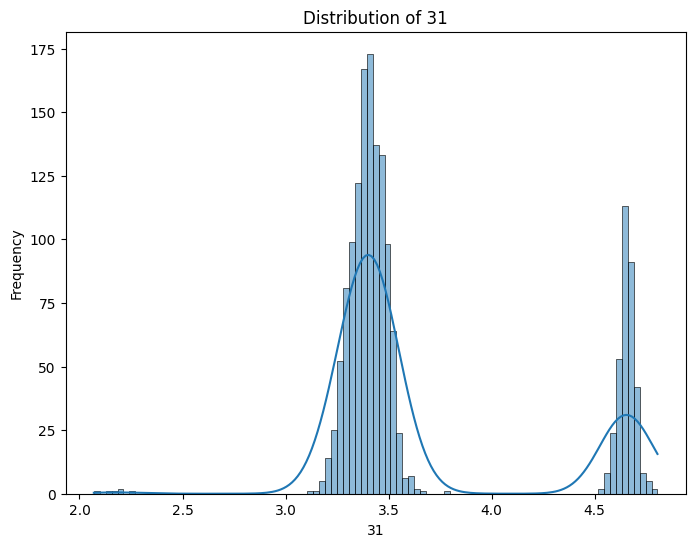

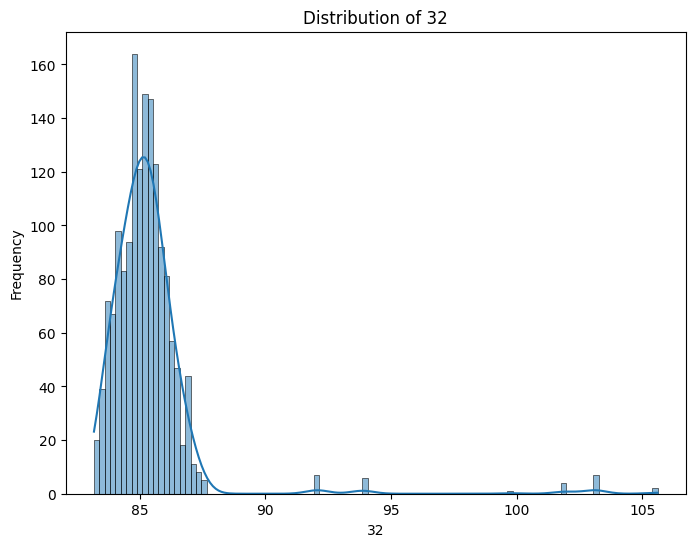

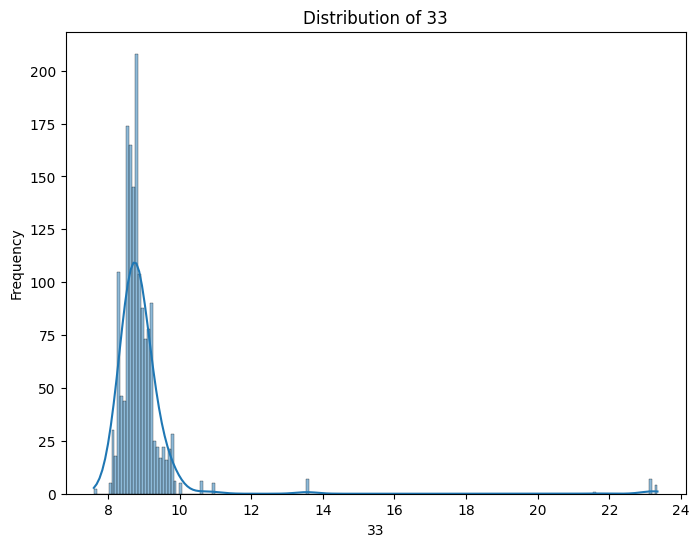

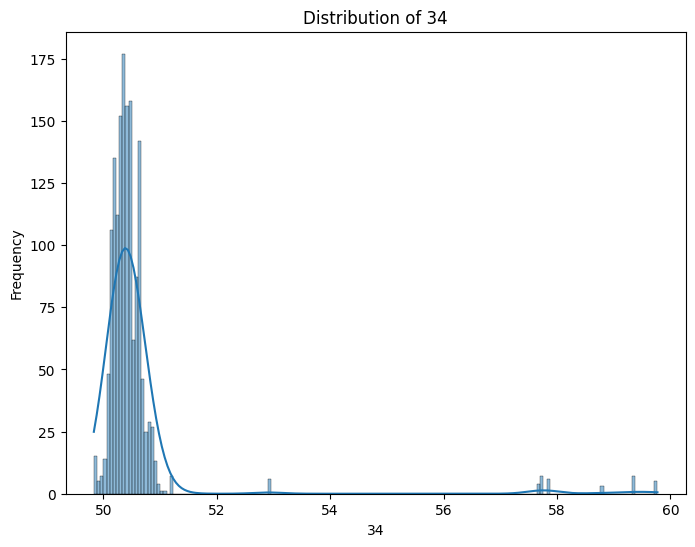

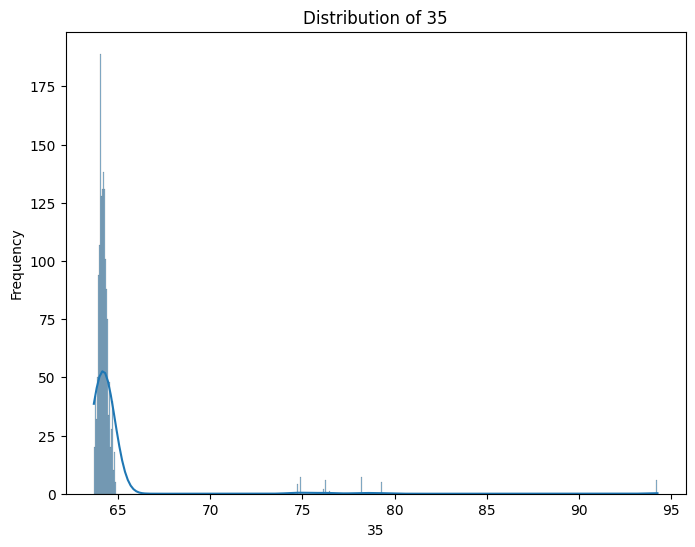

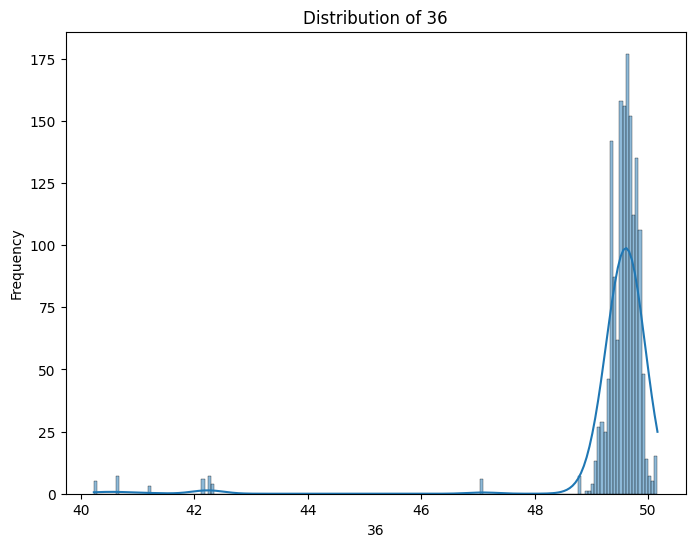

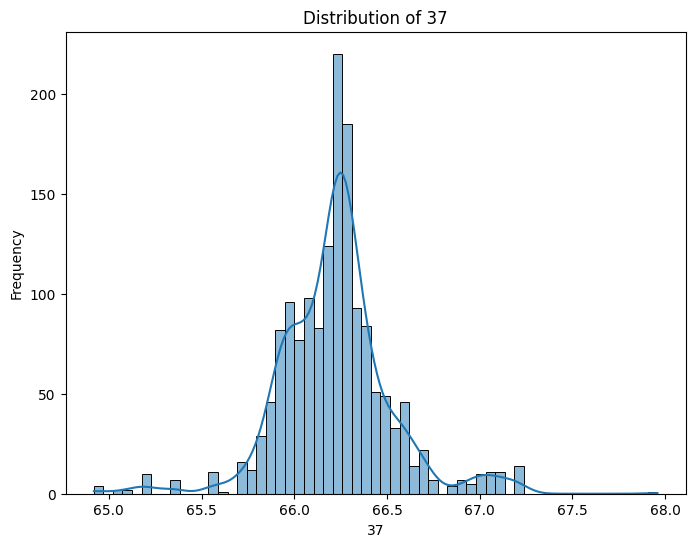

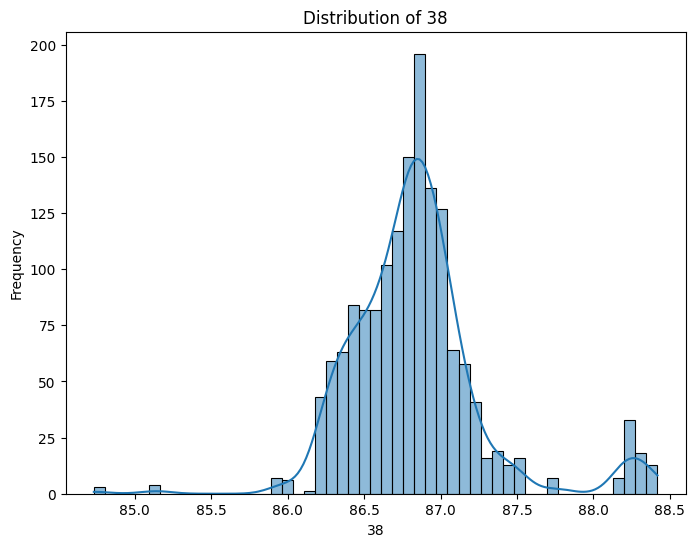

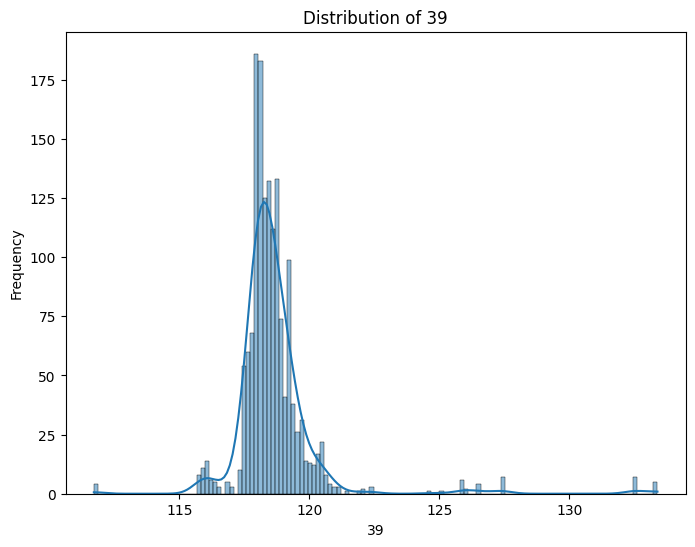

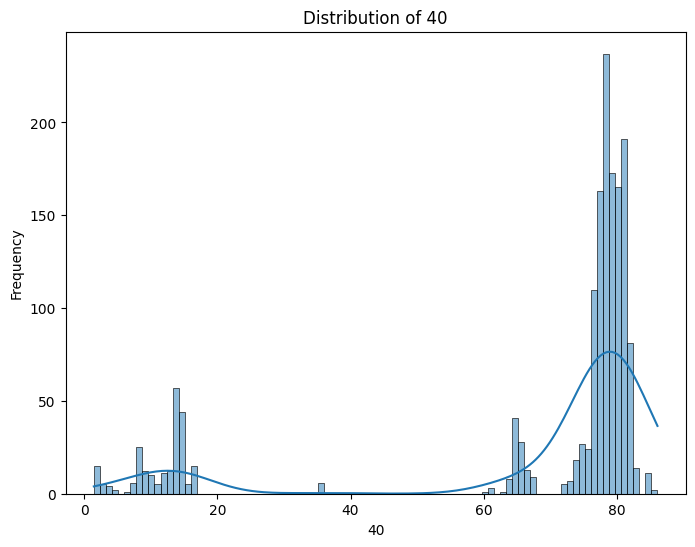

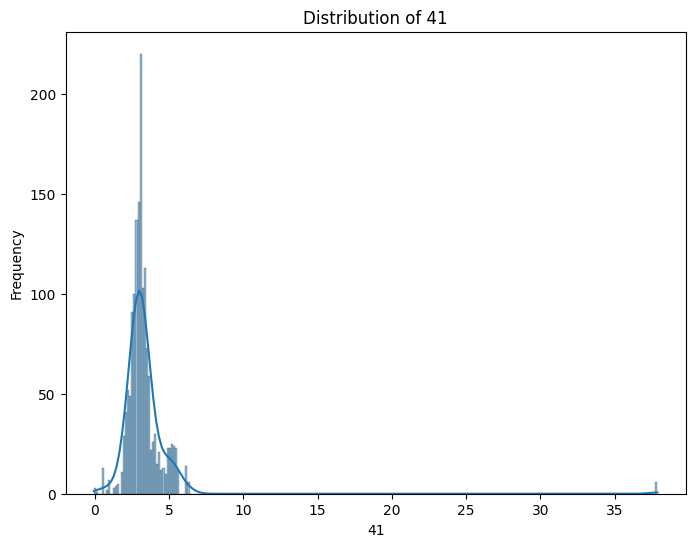

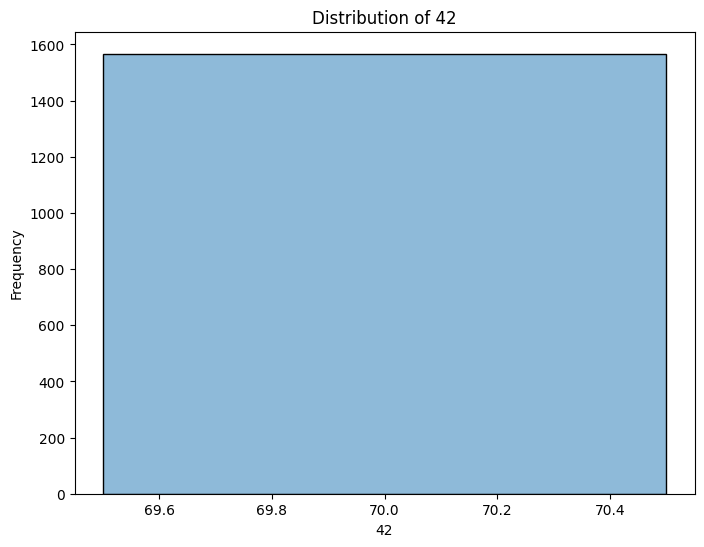

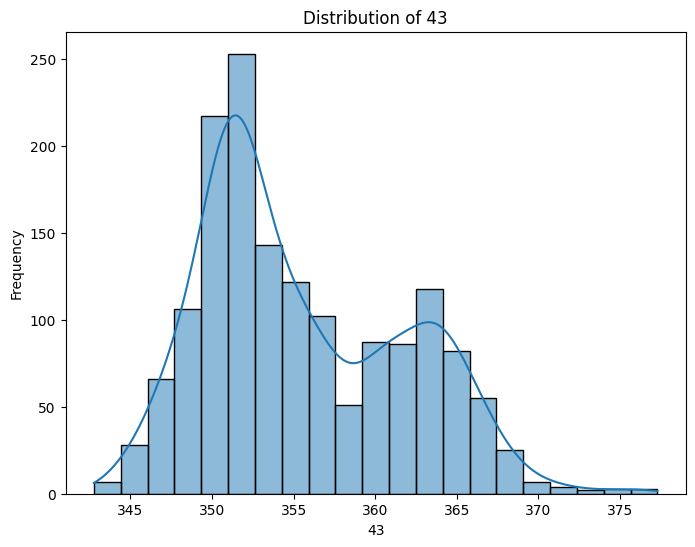

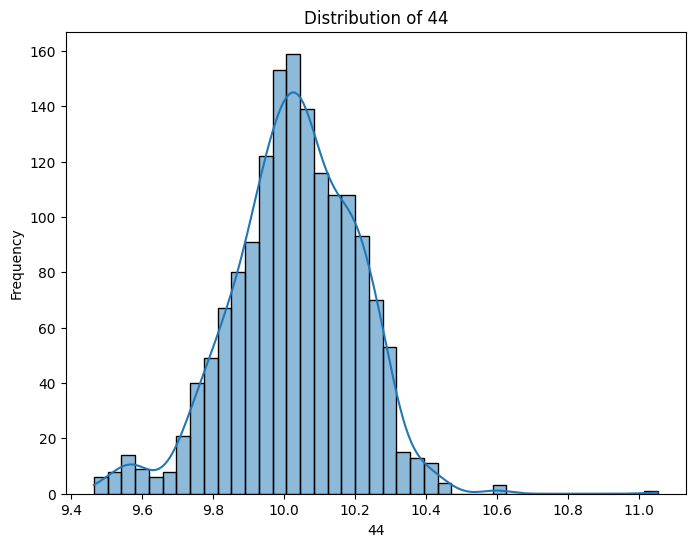

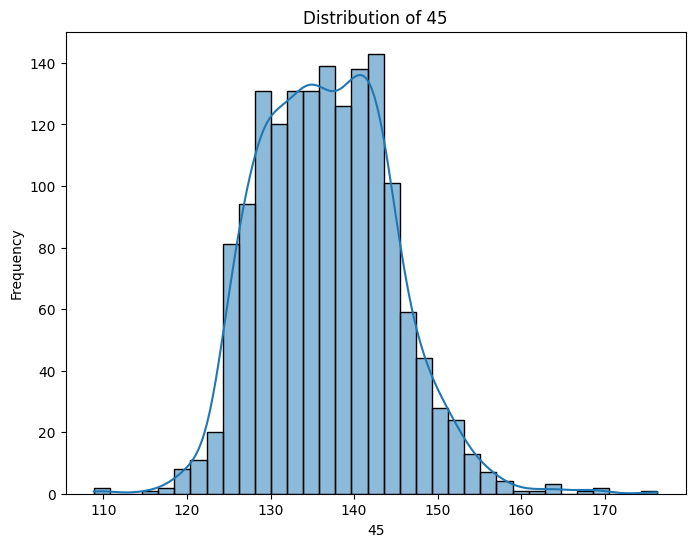

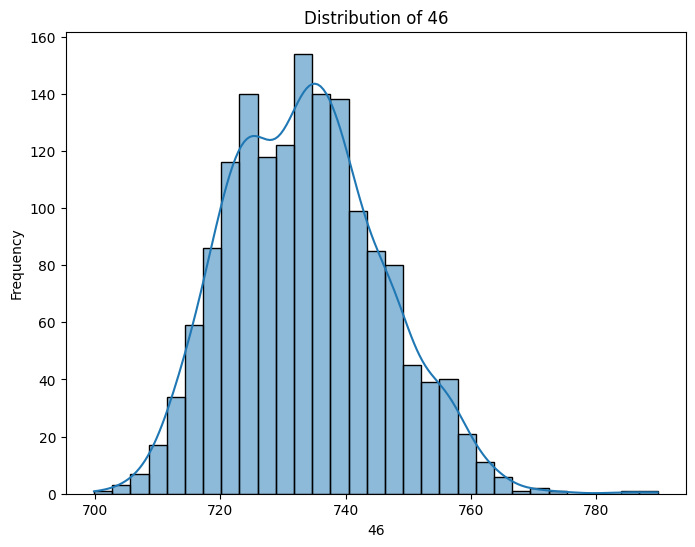

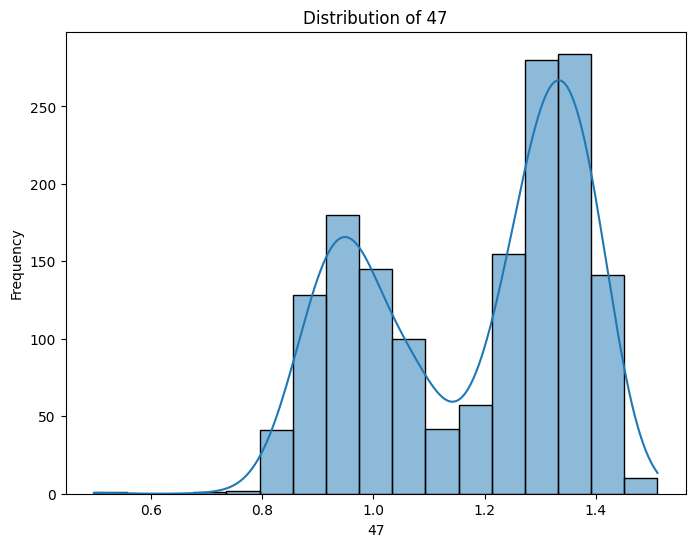

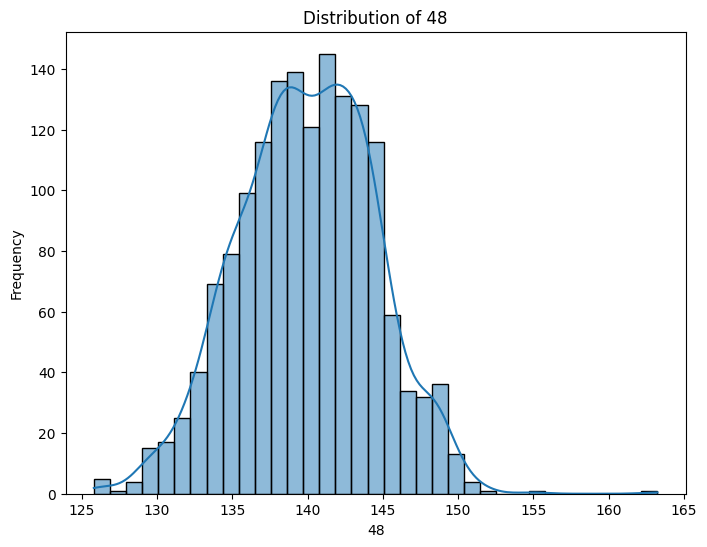

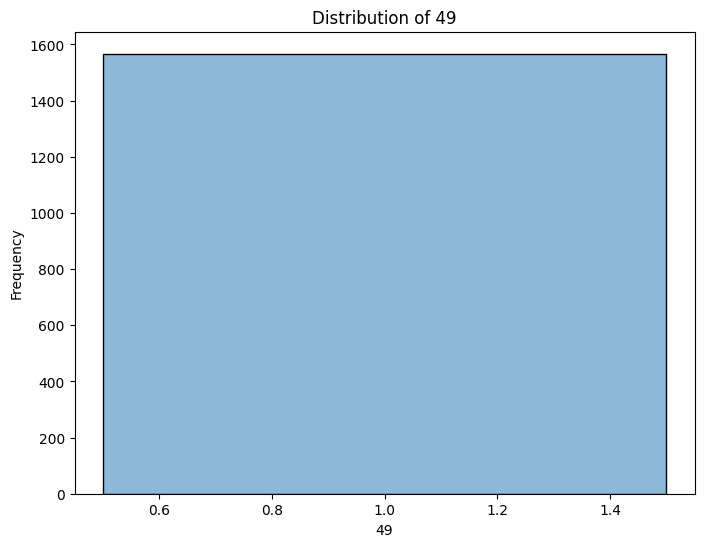

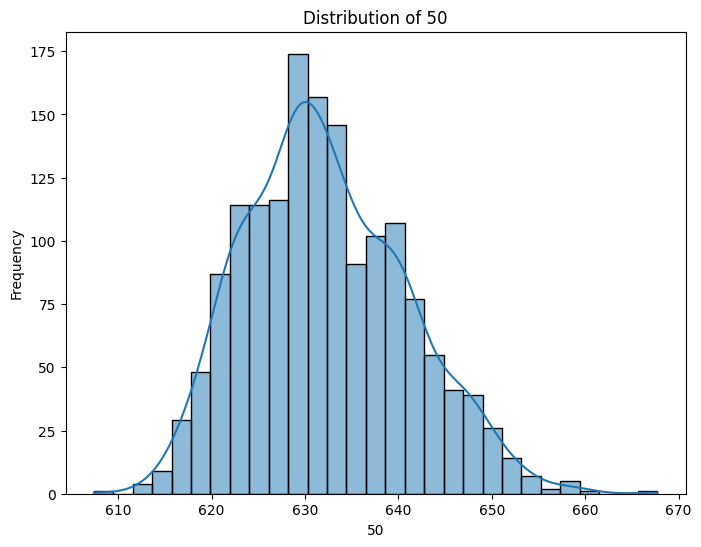

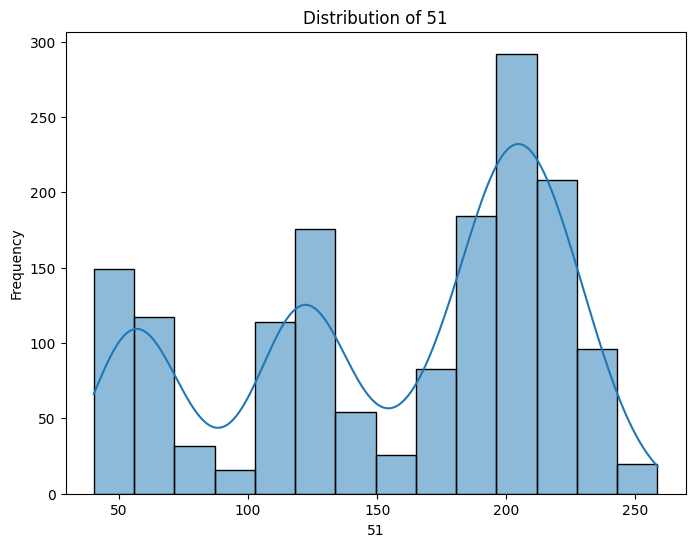

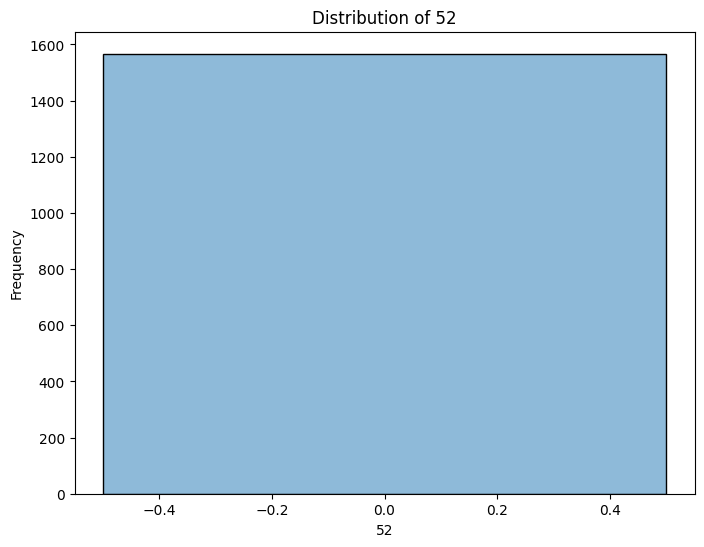

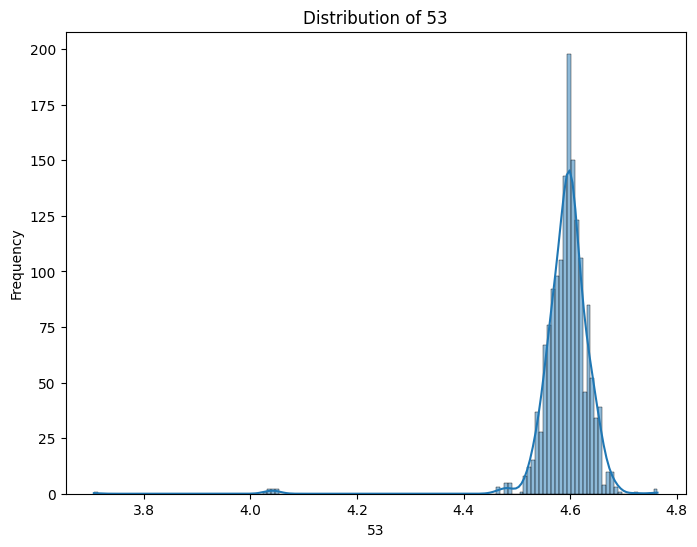

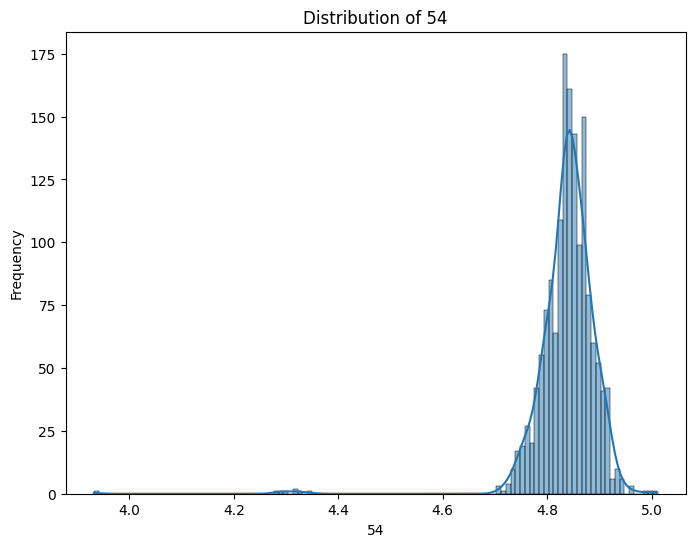

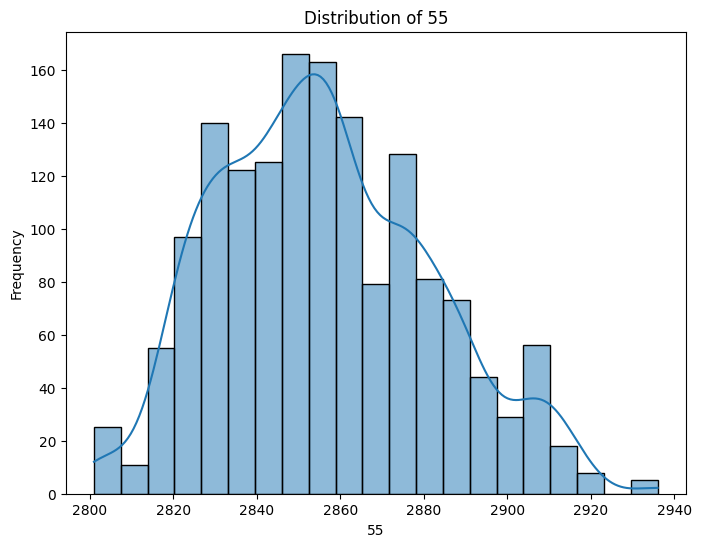

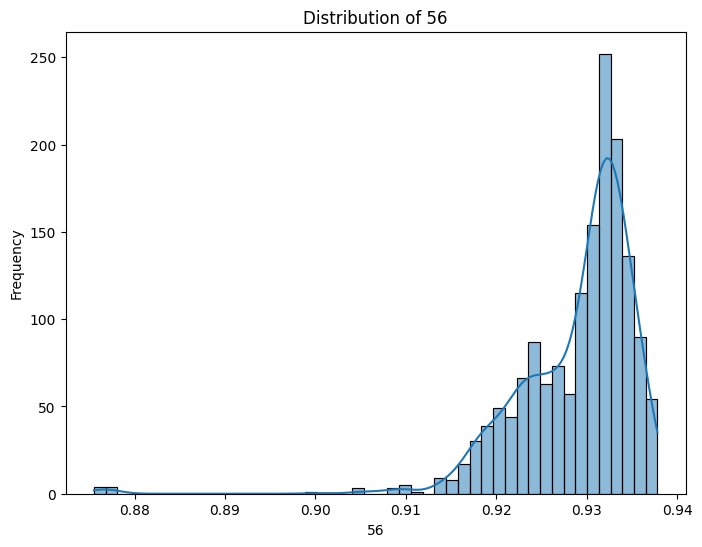

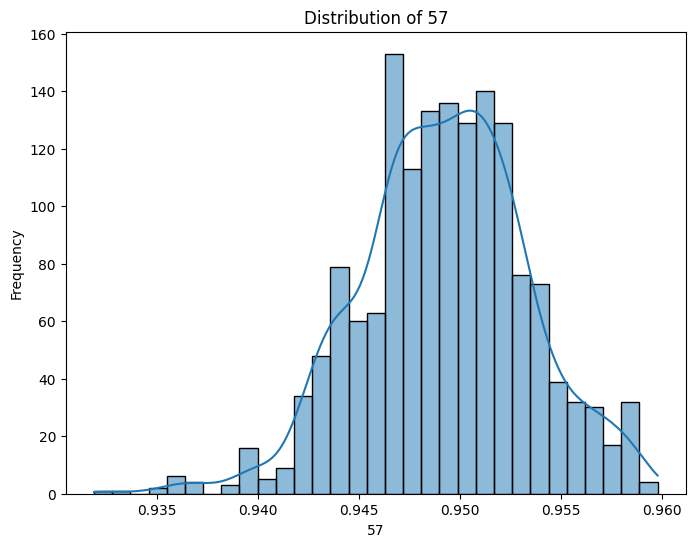

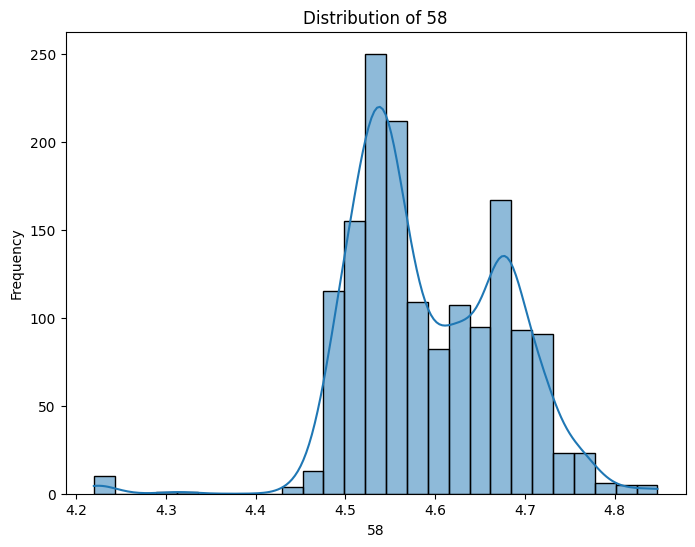

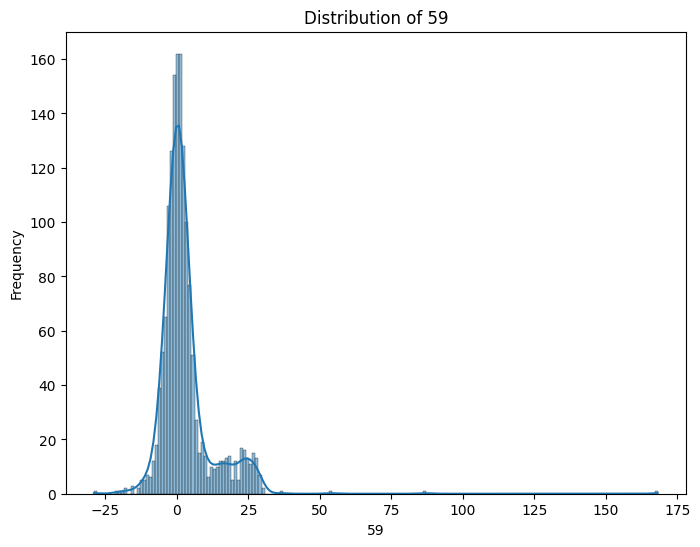

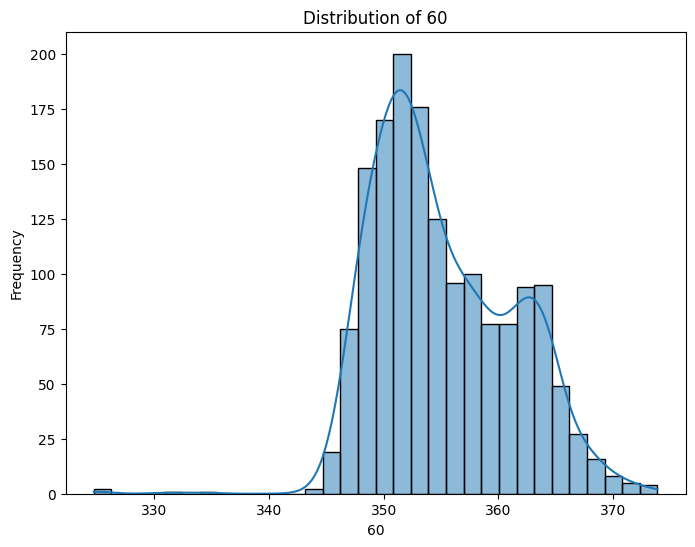

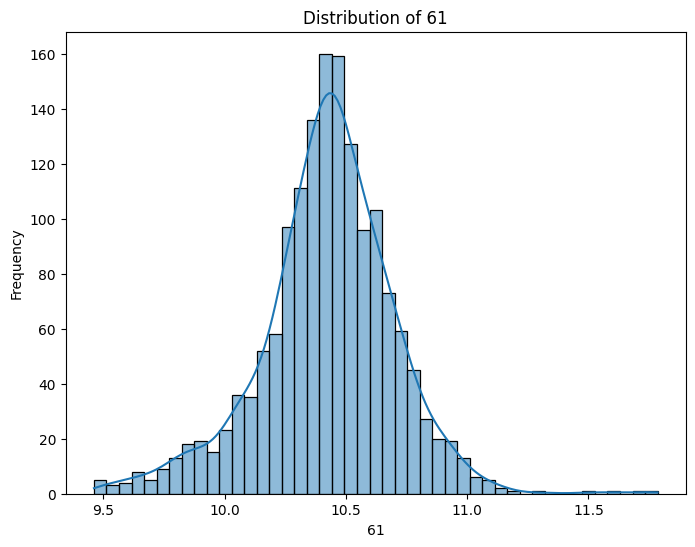

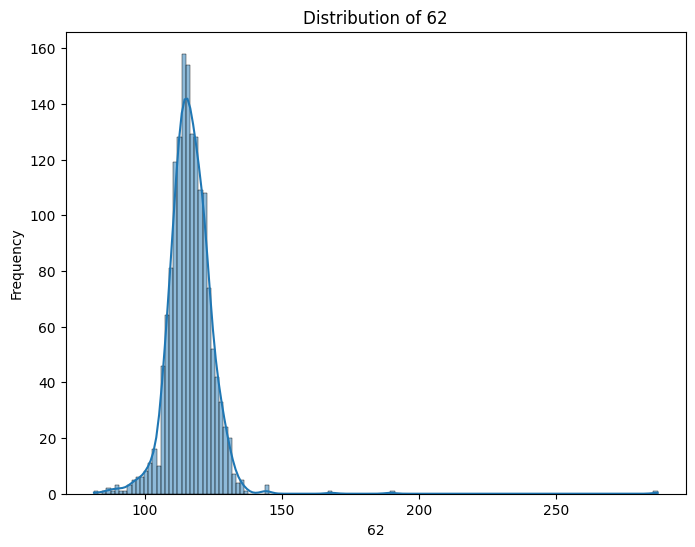

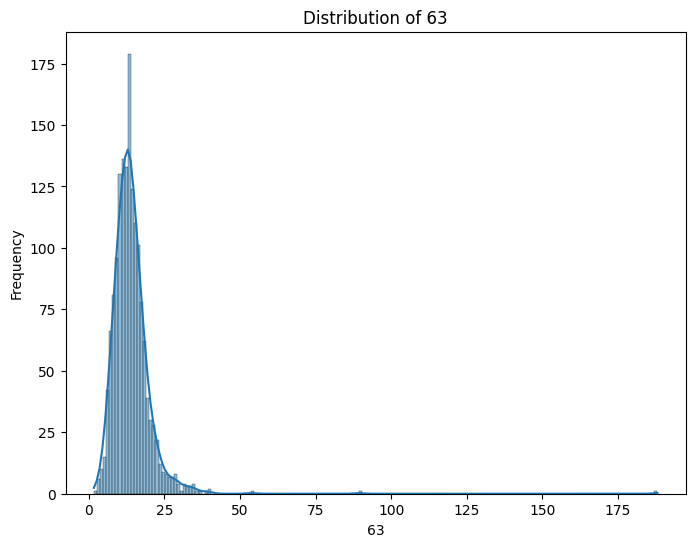

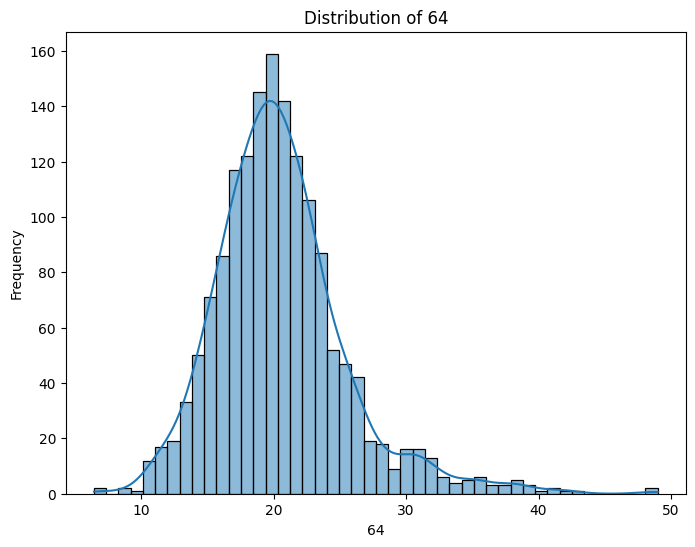

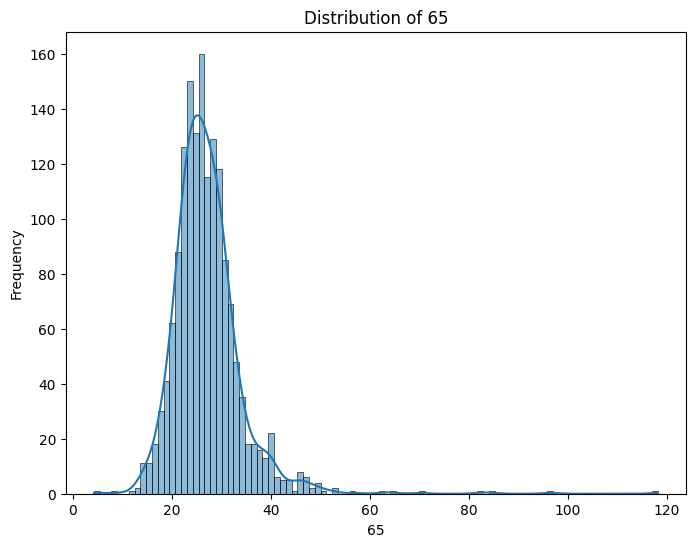

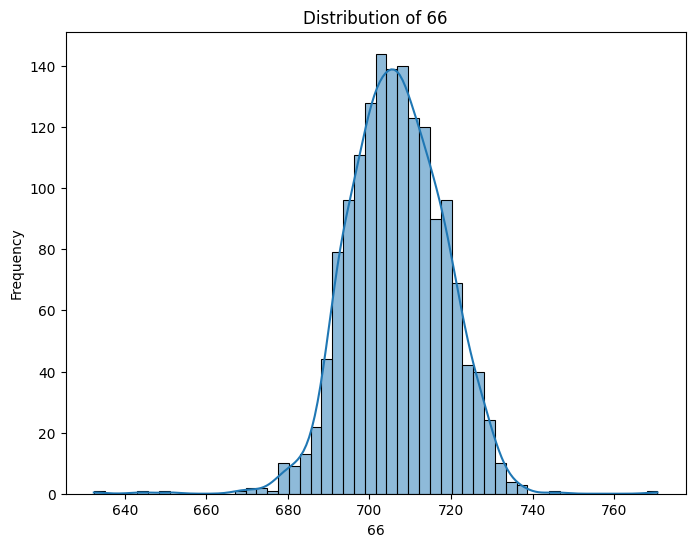

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('signal-data.csv')

print(data.head())
print(f'Shape of the dataset: {data.shape}')
print(data.info())
print(data.describe())
print("Column Names in the dataset:\n", data.columns)

target_column = 'Yield'  
missing_values = data.isnull().sum()
threshold = 0.3
data = data.loc[:, data.isnull().mean() < threshold]

numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

columns_to_drop = ['timestamp', 'unnecessary_column'] 
columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data.drop(columns=columns_to_drop, axis=1, inplace=True)

if target_column in data.columns:
    data[target_column] = data[target_column].apply(lambda x: 1 if x == 'Fail' else 0)
else:
    print(f"Target column '{target_column}' does not exist in the dataset.")

print(data.head())
print(f'Shape of the cleansed dataset: {data.shape}')
print("Remaining missing values in each column:\n", data.isnull().sum())

print(data.describe())

if target_column in data.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data[target_column])
    plt.title('Distribution of Pass/Fail Yields')
    plt.xlabel('Yield Type')
    plt.ylabel('Count')
    plt.show()
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

if target_column in data.columns:
    for feature in numerical_features:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[target_column], y=data[feature])
        plt.title(f'{feature} vs {target_column}')
        plt.xlabel('Yield Type')
        plt.ylabel(feature)
        plt.show()

plt.figure(figsize=(12, 10))
sns.pairplot(data[numerical_features + [target_column]], hue=target_column)
plt.show()

correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('signal-data.csv')

for col in data.columns:
    if data[col].dtype == 'object': 
        mode = data[col].mode()[0]
        data[col] = data[col].fillna(mode)
    else:  
        median = data[col].median()
        data[col] = data[col].fillna(median)

label_encoder = LabelEncoder()
data = data.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)

target_column = 'Pass/Fail'  
X = data.drop(columns=[target_column])
y = data[target_column]

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(pd.DataFrame(X_train).describe())
print(pd.DataFrame(X_test).describe())
print(pd.DataFrame(X_resampled).describe())


                0             1             2             3             4    \
count  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03  2.340000e+03   
mean   1.366428e-17 -1.292034e-15  2.214373e-15 -5.594765e-15 -7.135792e-17   
std    1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00  1.000214e+00   
min   -1.854722e+00 -3.688553e+00 -4.741772e+00 -5.072170e+00 -1.759705e+00   
25%   -7.375008e-01 -6.747639e-01 -5.255634e-01 -6.884717e-01 -7.115869e-01   
50%   -1.439772e-01 -1.332435e-01  4.655028e-02 -2.800331e-02 -2.364412e-01   
75%    7.534200e-01  5.778532e-01  5.470227e-01  5.806301e-01  5.035900e-01   
max    2.107274e+00  4.842937e+00  4.911458e+00  4.164520e+00  6.209644e+00   

                5       6             7             8             9    ...  \
count  2.340000e+03  2340.0  2.340000e+03  2.340000e+03  2.340000e+03  ...   
mean   6.832142e-18     0.0 -1.960066e-15  8.183387e-16 -1.425640e-15  ...   
std    1.000214e+00     0.0  1.000214e+00  1.000214e+0

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import joblib


data = pd.read_csv('signal-data.csv')

for col in data.columns:
    if data[col].dtype == 'object':  
        mode = data[col].mode()[0]
        data[col] = data[col].fillna(mode)
    else:  
        median = data[col].median()
        data[col] = data[col].fillna(median)

label_encoder = LabelEncoder()
data = data.apply(lambda col: label_encoder.fit_transform(col) if col.dtype == 'object' else col)

target_column = 'Pass/Fail'  
X = data.drop(columns=[target_column])
y = data[target_column]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training and Tuning
rf = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_train_acc = accuracy_score(y_train, rf_best.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf_best.predict(X_test))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_best.predict(X_test)))

svc = SVC(random_state=42)
svc_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svc_grid = GridSearchCV(estimator=svc, param_grid=svc_params, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid.fit(X_train, y_train)
svc_best = svc_grid.best_estimator_
svc_train_acc = accuracy_score(y_train, svc_best.predict(X_train))
svc_test_acc = accuracy_score(y_test, svc_best.predict(X_test))
print("SVM Classification Report:\n", classification_report(y_test, svc_best.predict(X_test)))

nb = GaussianNB()
nb.fit(X_train, y_train)
nb_train_acc = accuracy_score(y_train, nb.predict(X_train))
nb_test_acc = accuracy_score(y_test, nb.predict(X_test))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb.predict(X_test)))

print(f"Random Forest - Train Accuracy: {rf_train_acc:.4f}, Test Accuracy: {rf_test_acc:.4f}")
print(f"SVM - Train Accuracy: {svc_train_acc:.4f}, Test Accuracy: {svc_test_acc:.4f}")
print(f"Naive Bayes - Train Accuracy: {nb_train_acc:.4f}, Test Accuracy: {nb_test_acc:.4f}")

best_model = max([(rf_best, rf_test_acc), (svc_best, svc_test_acc), (nb, nb_test_acc)], key=lambda x: x[1])[0]

joblib.dump(best_model, 'best_model.pkl')

print("Best model saved as 'best_model.pkl'")


Random Forest Classification Report:
               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       306
           1       1.00      1.00      1.00       280

    accuracy                           1.00       586
   macro avg       1.00      1.00      1.00       586
weighted avg       1.00      1.00      1.00       586

SVM Classification Report:
               precision    recall  f1-score   support

          -1       1.00      0.99      0.99       306
           1       0.99      1.00      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586

Naive Bayes Classification Report:
               precision    recall  f1-score   support

          -1       0.98      0.18      0.31       306
           1       0.53      1.00      0.69       280

    accuracy                           0.57       586
   macro avg       0.75   